# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [87]:
import pandas as pd

df = pd.read_csv('...EDA_human_temperature/data/human_body_temperature.csv')

In [88]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats
import seaborn as sns
import numpy as np

In [89]:
df.groupby('gender').describe()

heart_rate                                                     \
            count       mean       std   min   25%   50%   75%   max   
gender                                                                 
F            65.0  74.153846  8.105227  57.0  68.0  76.0  80.0  89.0   
M            65.0  73.369231  5.875184  58.0  70.0  73.0  78.0  86.0   

       temperature                                                      
             count       mean       std   min   25%   50%   75%    max  
gender                                                                  
F             65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8  
M             65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

In [90]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution of body temperatures normal?

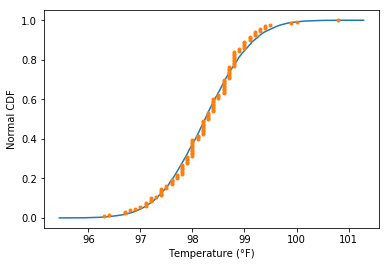

Distribution seems to be close enough to Normal to treat it as such


In [91]:
# Normal CDF vs. Sample CDF
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
samples = np.random.normal(mu, sigma, size=10000)
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df.temperature)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature (°F)')
_ = plt.ylabel('Normal CDF')
plt.show()
print("Distribution seems to be close enough to Normal to treat it as such")

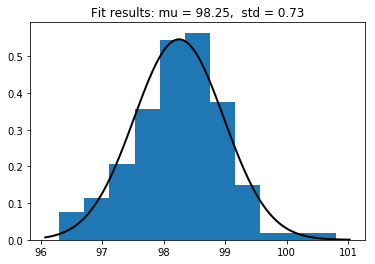

Distribution seems to be close enough to Normal to treat it as such


In [92]:
# Normal Distribution vs. Sample Histogram PDF
plt.hist(df.temperature,bins=11,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.title(title)
plt.show()
print("Distribution seems to be close enough to Normal to treat it as such")

## 2. Is the sample size large? Are the observations independent?
The sample size at 65 each for men and women is not large. The observations are independent, based on cited source.

## 3. Is the true population mean really 98.6 degrees F?

In [112]:
# Bootstrap Hypothesis Test: null hypothesis that sample mean and population mean are same
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)
p = np.sum(bs_replicates >= 98.6) / 10000
print('p-value = ', p) #reject null and therefore sample mean and population mean are significantly different

p-value =  0.0


In [110]:
# We want to use a one-sample test because we have a sample group mean to compare to given mean
# We want to use a t-test because the population std-dev. is unknown
# t-test:
t_val, p_val = scipy.stats.ttest_1samp(df.temperature, popmean=98.6)
print('t-statistic: '+str(t_val)+', p-value: '+str(p_val))
# z-stat:
z = (np.mean(df.temperature)-98.6)/(df.temperature.std()/len(df.temperature)**0.5)
p = scipy.stats.norm.sf(abs(z))*2
print('z-statistic: '+str(z)+', p-value: '+str(p))
# p-value very small, reject null, therefore having a mean of 98.6 is highly unlikely

t-statistic: -5.4548232923645195, p-value: 2.4106320415561276e-07
z-statistic: -5.454823292364079, p-value: 4.90215701411338e-08


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [95]:
# sample of size ten
s10 = np.random.choice(df.temperature, size=10)
# repeat part 3
# t-test:
t_val, p_val = scipy.stats.ttest_1samp(s10, popmean=98.6)
print('t-statistic: '+str(t_val)+', p-value: '+str(p_val))
# z-stat:
z = (np.mean(s10)-98.6)/(s10.std()/len(s10)**0.5)
p = scipy.stats.norm.sf(abs(z))*2
print('z-statistic: '+str(z)+', p-value: '+str(p))

t-statistic: -1.1426965457562512, p-value: 0.28265098262774235
z-statistic: -1.2045079196655226, p-value: 0.2283933228947953


The t-stat is still the tool to use, because of the small sample and unknown population standard deviation.
But because the small sample of ten, the p-value is larger and we would accept the null hypothesis that mean ~ 98.6

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

At around two standard deviations away from the mean there is a 95% probability the data is in that interval.

In [113]:
# bootstraped values 95% CI
ci_b = [np.percentile(sorted(bs_replicates),[2.5,97.5])[0], np.percentile(sorted(bs_replicates),[2.5,97.5])[1]]
print('95% CI with bootstraped values: '+str(ci_b))
# frequentist 95% CI
me = 1.96*(df.temperature.std()/len(df.temperature)**0.5)
ci = [np.mean(df.temperature) - me, np.mean(df.temperature) + me]
print('Temperatures between '+"{:.2f}".format(ci[0])+' and '+"{:.2f}".format(ci[1])+' degrees in the 95% confidence interval'
      +' are considered Normal, while temperatures outside this range are Abnormal.')

95% CI with bootstraped values: [98.1223076923077, 98.3753846153846]
Temperatures between 98.12 and 98.38 degrees in the 95% confidence interval are considered Normal, while temperatures outside this range are Abnormal.


## 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

Null Hypothesis: mean of male temperature is same as female (m_m - m_f == 0)
Alt. Hypothesis: mean of male temperature is not same as female (m_m - m_f != 0)

In [97]:
m = df.temperature[df.gender=='M']
f = df.temperature[df.gender=='F']
t_stat, p_val = scipy.stats.ttest_ind(m, f)
print('Mean Temps (Male, Female): '+str(np.mean(m))+', '+str(np.mean(f)))
print('t-statistic: '+str(t_stat)+', p-value: '+str(p_val))

Mean Temps (Male, Female): 98.1046153846154, 98.39384615384613
t-statistic: -2.2854345381656103, p-value: 0.02393188312239561


Since p-value is lower than 0.05, we reject null hypothesis that male and female body temps are the same.

From this sample of Body Temperatures, we concluded that 98.6 degrees was outside the 95% confidence interval.
We also concluded that male and female temperatures were different.
Given that 98.6 degrees is the universally used average body temperature, something must be off.
But considering the sample size, we can expect some inaccuracy.
We saw that when we bootstrapped the sample data to the true mean, we got a reasonable confidence interval.
Therefore, we have to approach the analysis of a smaller data set with the appropriate methods.